In [14]:
## Import thư viện
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

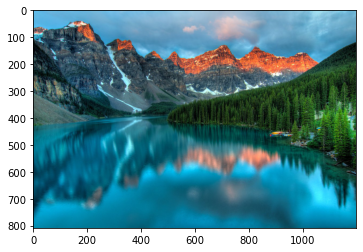

In [27]:
## Hàm đọc ảnh và in ảnh ra ngoài màn hình
img_before = Image.open('view.png')
plt.imshow(img_before)
img = np.array(img_before)
img_height, img_width = img.shape[0], img.shape[1]
img = img.reshape( img_height*img_width, img.shape[2])

In [32]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''

    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters , replace = False)]

        
    elif init_centroids == 'random':
        centroids = np.random.randint(0,255,size=(k_clusters,img_1d.shape[1]))

        
    for i in range(max_iter):
        # Gan cho centroids
        d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
        labels = np.argmin(d , axis = 0)
        
        # Cap nhat mean
        means = []
        for k in range(k_clusters):
            means.append(img_1d[labels == k].mean(axis = 0))
        means = np.array(means)
        for i in range(k_clusters):
          if len(means[i]) != 0:
            centroids[i] = means[i]
    
    d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
    labels = np.argmin(d , axis = 0)
    return centroids, labels

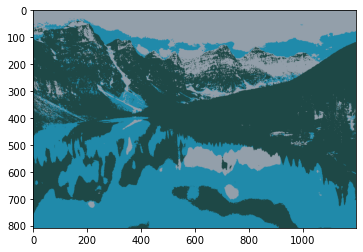

In [38]:
k_cluster = 3
img_after = img.copy()
centroids, labels = kmeans(img_after,k_cluster,10,'random')

## Gan label lai cho anh
for k in range(centroids.shape[0]):
  img_after[labels == k] = centroids[k]
  
img_after = img_after.astype("uint8")
img_after = img_after.reshape(img_height,img_width,3)
plt.imshow(img_after)

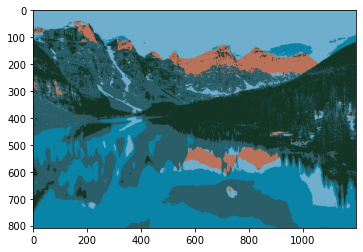

In [44]:
k_cluster = 5
img_after = img.copy()
centroids, labels = kmeans(img_after,k_cluster,10,'random')

## Gan label lai cho anh
for k in range(centroids.shape[0]):
  img_after[labels == k] = centroids[k]
  
img_after = img_after.astype("uint8")
img_after = img_after.reshape(img_height,img_width,3)
plt.imshow(img_after)

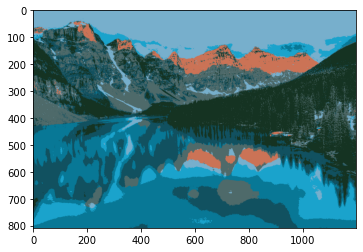

In [43]:
k_cluster = 7
img_after = img.copy()
centroids, labels = kmeans(img_after,k_cluster,10,'random')

## Gan label lai cho anh
for k in range(centroids.shape[0]):
  img_after[labels == k] = centroids[k]
  
img_after = img_after.astype("uint8")
img_after = img_after.reshape(img_height,img_width,3)
plt.imshow(img_after)